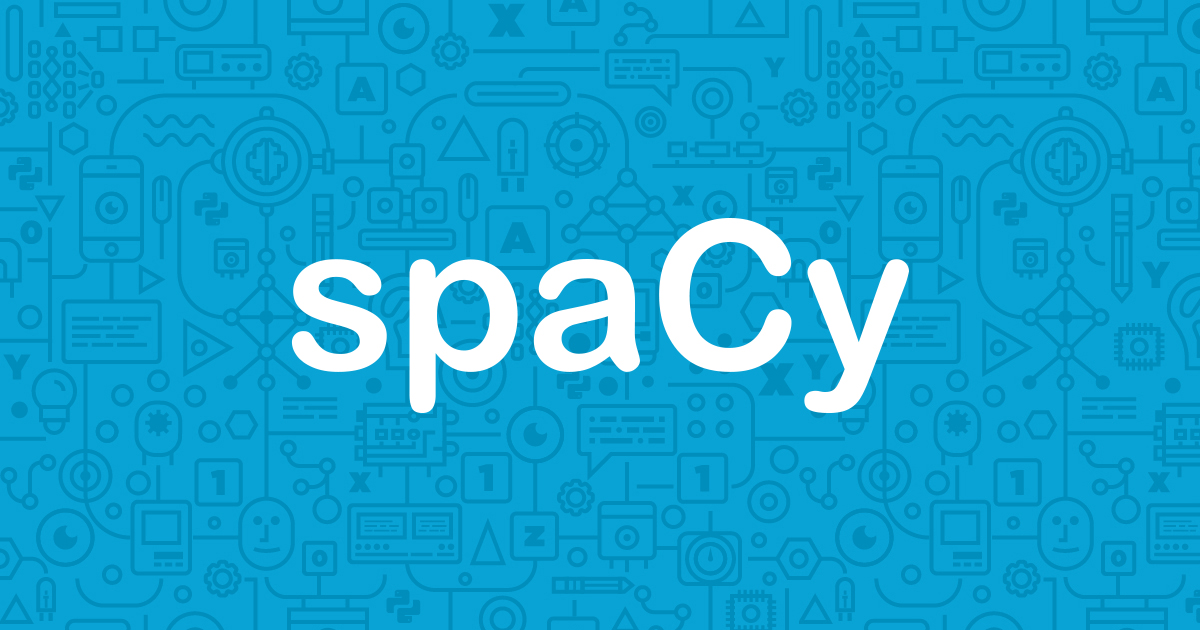

## Vectores de palabras

Uno de los temas centrales y cruciales a la hora de trabajar en NLP es el de los **vectores de palabras**: una **representación condensada de una palabra**. Lo interesante de estos vectores es que palabras semánticamente parecidas tienen vectores parecidos y por este motivo son **ideales para aplicaciones de similaridad semántica**, como **cálculo de similitud entre palabras, frases, oraciones y documentos**.

Los vectores se producen mediante un algoritmo que aprovecha el hecho de que **las palabras similares suelen utilizarse en contextos parecidos**. Para capturar el significado de una palabra, el algoritmo de vectores de palabras recolectan información de sus palabras vecinas. Este paradigma se llama **semántica distributiva**.

El mundo de la estadística trabaja con números y todos los métodos estadísticos trabajan con vectores. Por eso, **cuando trabajamos con vectores debemos representar cualquier cualidad del mundo real como un vector**, incluyendo los textos. Vamos a ver algunas de las vectorizaciones más comunes.

***

### One-hot encoding

Este método de vectorización es **uno de los más simples y directos** para asignar vectores a las palabras. Les **asigna un index value a cada palabra** en el vocabulario y luego **codifica el valor en un vector disperso** (sparse vector). Veamos un ejemplo. Supongamos que tenemos una aplicación para pedir helado en la que asignamos un índice a cada palabra en base al orden en el que aparecen en el vocabulario:

* 1 y
* 2 casa
* 3 mi
* 4 helado
* 5 chocolate
* 6 de
* 7 vainilla
* 8 a
* 9 pedir
* 10 quiero

El vector de cada una de esas palabras sería 0 excepto en la posición del índice correspondiente a la palabra. En el mismo orden que la lista anterior:

<br>**1** 0 0 0 0 0 0 0 0 0
<br>0 **1** 0 0 0 0 0 0 0 0
<br>0 0 **1** 0 0 0 0 0 0 0
<br>0 0 0 **1** 0 0 0 0 0 0
<br>0 0 0 0 **1** 0 0 0 0 0
<br>0 0 0 0 0 **1** 0 0 0 0
<br>0 0 0 0 0 0 **1** 0 0 0
<br>0 0 0 0 0 0 0 **1** 0 0
<br>0 0 0 0 0 0 0 0 **1** 0
<br>0 0 0 0 0 0 0 0 0 **1**

Y ahora **podemos representar una frase como una matriz**. Por ejemplo, la frase "quiero vainilla y chocolate" está plasmada en la siguiente matriz:

<br>0 0 0 0 0 0 0 0 0 **1**
<br>0 0 0 0 0 0 **1** 0 0 0
<br>**1** 0 0 0 0 0 0 0 0 0 
<br>0 0 0 0 **1** 0 0 0 0 0 

Como se deduce de esto, **la longitud de los vectores depende de la cantidad de palabras en el vocabulario**. Cuando aplicamos OHE, **cada palabra se reemplaza por su vector** y **cada frase, por su matriz de forma (N, V)**, donde N es el número de palabras en la oración y V es el tamaño del vocabulario.

Este tipo de vectorización es fácil de computar y debuggear, pero tiene algunos problemas:

- Los vectores son dispersos, es decir, tienen muchos 0 pero sólo un 1. Esto es un desperdicio de espacio, más todavía si consideramos que palabras con significados similares pueden compartir algunas dimensiones. Además, algunos algoritmos tienen probelmas para procesar vectores de alta dimensionalidad y vectores dispersos en general.
- Por otro lado, si nuestro vocabulario tiene un millón de palabras, cada vector tendría un millón de dimensiones, algo que es imposible de llevar a la práctica en términos de memoria y poder computacional.
- Por último, estos vectores no tienen ningún *significado*. Las palabras similares no tienen ninguna similitud entre sus vectores y no capturan en absoluto su relación semántica.

Para eso, se inventaron otros tipos de vectores de palabras.

***

### CountVectorizer y TF-IDF

Estos vectores, conocidos como **bag-of-words** -porque descartan toda la información de la relación entre palabras y sus contextos-, transforman las palabras en vectores mediante **la cuenta de las ocurrencias de cada palabra en los documentos** que estamos vectorizando. En el caso de CountVectorizer, **convierte el documento en una matriz en la que cada palabra es una feature** y simplemente **cuenta la cantidad de ocurrencias de esa palabra** en el documento en cuestión.

TF-IDF realiza un proceso similar al CountVectorizer, pero **asigna adicionalmente pesos** a las palabras para **ponderar la importancia de cada una de ellas inversamente a la cantidad de veces que aparecen en un documento**. Esto quiere decir que da una **importancia adicional a las palabras menos frecuentes**.

Ninguno de estos enfoques provee información semántica de las palabras, pero es una técnica un poco más avanzada que OHE. Se suelen utilizar cuando queremos realizar algún trabajo que se concentre en ocurrencias de palabras, como **topic modeling**.

****

### Word vectors

Los vectores de palabras son una solución a los problemas del One-hot Encoding, y son **vectores de tamaño fijo, densos y con valores reales**: representaciones del texto aprendidas donde **palabras semánticamente similares tienen representaciones similares**. Esto se logra mediante una **serie de valores de punto flotante que indican ubicaciones en el espacio vectorial**, y **la distancia entre vectores indica la similitud entre el significado** de las palabras correspondientes. Es decir, el significado de una palabra está distribuido a través de las dimensiones, motivo por el cual este paradigma se conoce como **semántica distributiva**.

Podemos usar el [visualizador de vectores de palabras de TensorFlow](https://projector.tensorflow.org/) para ver una representación tridimensional de vectores de 200 dimensiones. Palabras con significados parecidos se encuentran más cerca entre ellas en ese espacio vectorial. Por ejemplo, palabras como "pizza" están cerca de "queso", "cocinar", "estómago", "gaseosa", entre otras. Y nombres propios como "Elizabeth" están cerca de "reina", "monarca", "Inglaterra", "corona". Este tipo de codificación nos permite ver otra de las características de los vectores de palabras: las **analogías de palabras**.

***

### Analogías y operaciones con vectores

Como vimos en la sección anterior, las representaciones aprendidas de palabras permiten capturar la semántica. Además, **los vectores de palabras permiten operaciones entre vectores** como suma y resta. De hecho, sumar y restar vectores es una manera de trabajar con analogías.

Una **analogía de palabras es una relación semántica entre dos palabras**, como sinónimos y antónimos, entre otras. Algunos ejemplos entre pares son (King - man, Queen - woman), (airplane - air, ship - sea), (branch - tree, arm - human), (forward - backward, absent - present).

En uno de los casos anteriores, podemos pensar en el mapeo de género entre Queen y King como _Queen - Woman + Man = King_. Es decir, la analogía se lee como "reina es a rey lo que mujer es a hombre". Para ver cómo funcionan estas relaciones, es interesante ver cómo se crean los vectores.

***

### ¿Cómo se crean los vectores de palabras?

Existen varios métodos de creación de vectores de palabras. La mayoría se entrenan con grandes corpus de texto, como Wikipedia, noticias o Twitter. Veamos algunos de los vectores preentrenados más comunes:

* **Word2Vec** es el nombre de un algoritmo creado por Google para convertir palabras en vectores. Se entrenan usando una arquitectura de redes neuronales que procesan bloques de palabras y predicen el vector para cada una de ellas dependiendo de su contexto. Los vectores preentrenados se pueden descargar [aquí](https://developer.syn.co.in/tutorial/bot/oscova/pretrained-vectors.html#word2vec-and-glove-models), y [aquí](https://jalammar.github.io/illustrated-word2vec) hay más información sobre el algoritmo y los pasos de preparación de los datos.
* Los vectores **Glove**, creados en la Universidad de Stanford, son otro tipo de algoritmo que depende de la descomposición en valores singulares de las palabras que se usa en la co-ocurrencia en una matriz. Los vectores se pueden descargar [aquí](https://nlp.stanford.edu/projects/glove).
* **fastText** fue creado por Facebook Research y es similar a word2vec, excepto que en vez de predecir las palabras del contexto, predice subpalabras, es decir, n-gramas dentro de la palabra misma. Los modelos se pueden descargar de [aquí](https://fasttext.cc/docs/en/crawl-vectors.html).

Todos estos vectores pueden ser importados por spaCy para su utilización.

***

En todos los casos, **los algoritmos vectorizan en base al contexto**. Cuando trabajamos con palabras similares, uno de los conceptos que surge es el de sinonimidad. Algunas palabras, como "elección" y "decisión", son sinónimos y se usan en contextos parecidos, por ejemplo "Queremos libertad de elección" o "Queremos libertad de decisión". Y con los antónimos, como "amor" y "odio", pasa algo similar: "Amo a los gatos" y "Odio a los gatos". **Esto quiere decir que los vectores tanto de los sinónimos como de los antónimos son muy parecidos**, por lo que debemos ser muy cuidadosos cuando trabajamos con estos vectores. Una de las librerías especiales para entrenar vectores es [Gensim](https://radimrehurek.com/gensim).

***

### Usando los vectores preentrenados de spaCy

Los **vectores de palabras son parte de muchos de los modelos precargados de spaCy**, como los que venimos usando hasta ahora, y utiliza **Word2Vec**. Por ejemplo, 'en_core_web_md' tiene vectores de 300 dimensiones para 20.000 palabras, mientras que 'en_core_web_lg' tiene un vocabulario de 685.000 palabras. Los modelos pequeños no suelen tener vectores pero sí tensores sensibles al contexto, por lo que pueden realizar cálculos de similitud pero no son tan precisos.

El atributo `token.vector` devuelve un array de NumPy. Por ende, se puede llamar a los métodos de NumPy sobre ellos. Veamos un ejemplo de un vector de palabra:

In [1]:
# Importamos spaCy

import spacy

In [2]:
# Creamos el pipeline de procesamiento

nlp = spacy.load('es_core_news_md')

In [3]:
# Creamos un documento y vemos el vector de una de sus palabras

doc = nlp("Ayer me fui de joda con los pibes.")

doc[3].vector

array([ 3.8853e-01,  9.9683e-02,  5.9997e+00, -8.3435e-01,  3.7426e+00,
       -1.3226e+00,  3.3948e+00, -2.8459e+00,  3.2895e+00, -2.7674e+00,
       -1.8199e+00,  5.8592e+00,  1.8985e+00,  1.2966e+00, -4.7495e+00,
        2.9580e+00,  5.3088e+00,  1.1556e+00,  1.0316e+00,  3.1661e+00,
        5.0065e-01,  6.6373e-01,  1.2299e+00,  1.0512e+00, -1.7420e-03,
        4.6153e+00, -1.9621e+00,  6.4910e+00, -1.3927e+00, -6.9031e+00,
        1.1644e+00,  3.5639e+00,  2.3457e+00,  1.4812e+00,  2.0457e+00,
       -5.5955e+00,  3.4128e-01, -6.3943e-01,  6.2033e-01, -4.3092e+00,
       -1.7449e+00, -1.2369e+00, -6.7810e+00,  1.6553e+00, -5.3376e+00,
        4.6547e+00, -3.6411e+00,  1.0734e+00, -5.2617e+00,  5.5084e+00,
        9.0538e-01,  4.6132e-01,  7.9270e-01,  2.5153e+00, -2.8288e+00,
       -3.4798e+00, -4.0388e+00,  1.5300e+00, -2.5683e+00, -4.9229e+00,
        1.4632e+00,  3.1376e+00, -3.1685e+00,  2.5889e-01, -7.5349e-02,
        1.1427e+00, -1.7928e+00, -3.5775e-01, -3.2911e+00, -4.37

In [4]:
# Observamos la dimensionalidad del vector

doc[3].vector.shape

(300,)

Los `Doc` y `Span` también tienen vectores. El vector de una oración o frase es el promedio de sus vectores de palabras. Por ejemplo, el vector de la frase anterior:

In [5]:
# Vemos el vector del documento

doc.vector

array([ 1.4271045 , -1.5696574 , -0.01698099,  0.6905758 , -0.5928023 ,
       -0.49547222, -0.8780633 , -1.7920941 ,  0.9584556 ,  0.7964795 ,
        0.43334666,  1.073051  ,  1.3936332 ,  0.21246001, -0.4864989 ,
        0.6884044 ,  1.2912984 ,  0.7490958 ,  0.3757044 ,  0.26210558,
        0.40601942,  0.96222866,  0.27235878, -0.51652783,  0.6061334 ,
        1.1876501 , -1.2050356 , -0.04513998, -0.669466  ,  0.19871119,
       -2.6268308 ,  1.6780822 ,  0.3847052 , -0.9477422 ,  1.1298375 ,
       -0.5687711 , -0.36371887, -0.90478325,  0.10436925, -0.6427185 ,
        0.4966667 , -0.50018555,  0.5517591 ,  1.6871397 ,  1.3479347 ,
       -0.33812672, -0.7965767 ,  0.47137907, -0.2950555 ,  1.4646244 ,
        0.36606672, -1.5167793 , -0.97600883,  0.78480893, -0.67121583,
       -2.02441   ,  0.53963345,  0.74737996,  1.1572167 , -0.2057389 ,
        1.2341411 ,  1.3214011 , -1.7290069 ,  1.3585434 ,  0.87081885,
       -0.30678776, -1.2568755 , -1.8119245 ,  1.2889457 ,  0.73

Obviamente, sólo las palabras que están dentro del vocabulario de spaCy tienen vectores. Las palabras sin vector son consideradas OOV (Out Of Vocabulary). `token.is_oov` y `token.has_vector` son los métodos que podemos consultar para ver si el token está dentro del vocabulario y si tiene vector, respectivamente:

In [6]:
doc = nlp("La verdad me parecés un pichiruchi.")

for token in doc:
    print(f"{token.text:15}" + f"{str(token.is_oov):10}" + f"{str(token.has_vector)}")

La             False     True
verdad         False     True
me             False     True
parecés        False     True
un             False     True
pichiruchi     True      False
.              False     True


### El método similarity

En spaCy, cada objeto de tipo contenedor tiene un método `similarity` que nos permite calcular qué tan parecidos semánticamente son con otros objetos contenedores al comparar sus vectores de palabras. Devuelve un valor entre 0 y 1, en el que 0 indica que no existe relación de similitud semántica entre los objetos comparados y 1 indica que son la misma frase. En este ejemplo, podemos ver qué tan parecidos son dos Span:

In [7]:
doc1 = nlp("Viajé a Inglaterra.")
doc2 = nlp("Fui a Londres.")

doc1[0:3].similarity(doc2[0:3])

0.8407114

También podemos comparar dos tokens, en este caso England y London:

In [8]:
doc1[2].similarity(doc2[2])

0.69614726

O podemos comparar la similitud de la frase completa:

In [9]:
doc1.similarity(doc2)

0.8770379574744953

In [10]:
doc1.similarity(doc1)

1.0

Juzgar las distancias entre números puede ser complejo de encarar. Por ver los vectores plasmados visualmente puede ayudar a entender cómo se agrupan las palabras. Veamos un ejemplo que nos permita visualizar dos clases semánticas definidas, una de animales y otra de comida.

In [11]:
# Importamos las librerías

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import spacy

In [12]:
# Cargamos el modelo
nlp = spacy.load('es_core_news_md')

# Creamos un string con el listado de palabras que queremos visualizar
vocab = nlp("animal gato perro tigre elefante mono león cebra mascota hamburguesa pizza comida queso vino ensalada fideos fruta vegetales")

# Creamos la lista de palabras dentro del Doc
words = [word.text for word in vocab]

# Stackeamos verticalmente los vectores con np.vstack
vecs = np.vstack([word.vector for word in vocab if word.has_vector])

# Usamos PCA para proyectar los vectores de 300 dimensiones en un espacio bidimensional
pca = PCA(n_components=2)

# Usamos el modelo para fittear
vecs_transformed = pca.fit_transform(vecs)

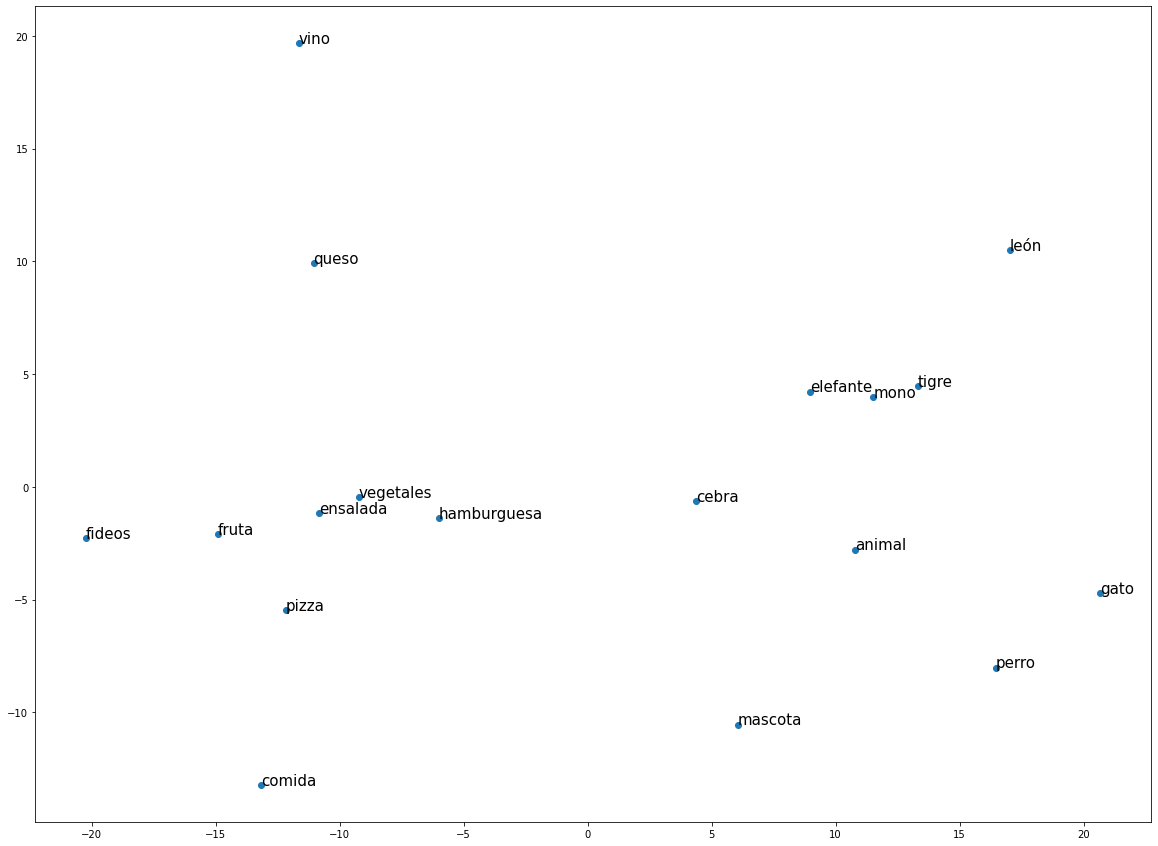

In [13]:
# Creamos la visualización

plt.figure(figsize=(20, 15))
plt.scatter(vecs_transformed[:,0], vecs_transformed[:,1])

for word, coord in zip(words, vecs_transformed):
    x,y = coord
    plt.text(x,y,word, size=15)
    
plt.show()